# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'data/train.p'
validation_file= 'data/valid.p'
testing_file = 'data/test.p'
classes_file = 'signnames.csv'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
classes = {}
with open(classes_file, mode='r') as f:
    for line in f:
        i, label = line.split(',')
        if i != 'ClassId':
            classes[int(i)] = label.strip()

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = (X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(np.concatenate((y_train, y_valid, y_test))))

n_class_names = len(classes.items())

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print("Number of class names =", n_class_names)
print("Classes=")
for i, label in classes.items():
    print(i, "=", label)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (34799, 32, 32, 3)
Number of classes = 43
Number of class names = 43
Classes=
0 = Speed limit (20km/h)
1 = Speed limit (30km/h)
2 = Speed limit (50km/h)
3 = Speed limit (60km/h)
4 = Speed limit (70km/h)
5 = Speed limit (80km/h)
6 = End of speed limit (80km/h)
7 = Speed limit (100km/h)
8 = Speed limit (120km/h)
9 = No passing
10 = No passing for vehicles over 3.5 metric tons
11 = Right-of-way at the next intersection
12 = Priority road
13 = Yield
14 = Stop
15 = No vehicles
16 = Vehicles over 3.5 metric tons prohibited
17 = No entry
18 = General caution
19 = Dangerous curve to the left
20 = Dangerous curve to the right
21 = Double curve
22 = Bumpy road
23 = Slippery road
24 = Road narrows on the right
25 = Road work
26 = Traffic signals
27 = Pedestrians
28 = Children crossing
29 = Bicycles crossing
30 = Beware of ice/snow
31 = Wild animals crossing
32 = End of all speed and passing limits
33 = Turn 

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

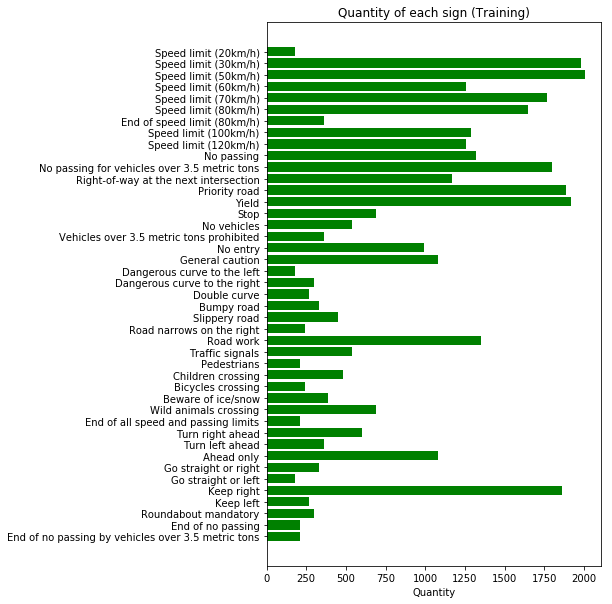

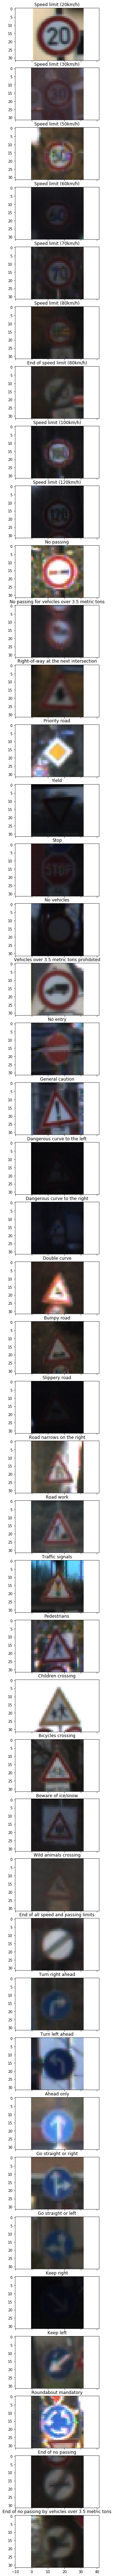

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

fig, ax = plt.subplots(figsize=(6, 10))

signs = []
quantities = []

sign, examples, count = np.unique(y_train, return_index=True, return_counts=True)
signCount = dict(zip(sign, count))

for i, label in classes.items():
    signs.append(label)
    quantities.append(signCount[i])

y_pos = np.arange(len(signs))

ax.barh(y_pos, quantities, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(signs)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Quantity')
ax.set_title('Quantity of each sign (Training)')

plt.show()

# show an image from each class
fig, axs = plt.subplots(nrows=len(signs), ncols=1, squeeze=False, sharex='all', sharey='all', figsize=(4,100))
fig.tight_layout()

for ax, label, example in zip(axs, signs, examples):
    #ax[0].imshow(bimg)
    ax[0].imshow(X_train[example])
    ax[0].set_title(label)
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from __future__ import division

# TODO(j): validate that images look OK after rgb2gray and normalize
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

def normalize(image):
    return (image - 128.0) / 128.0

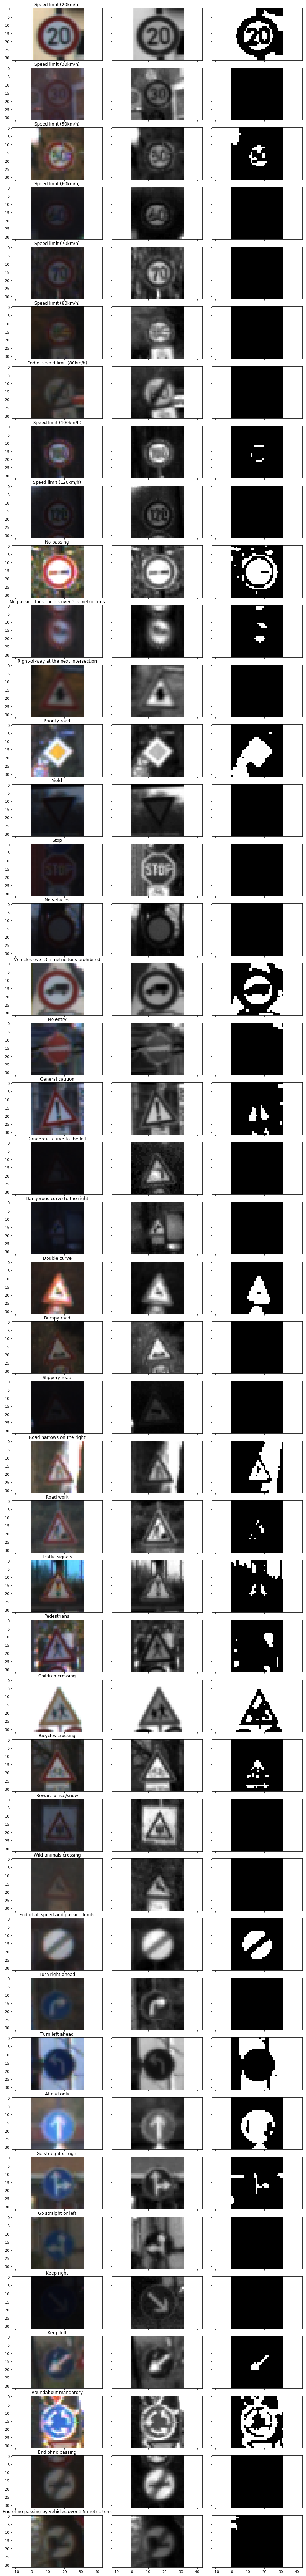

In [5]:
# show an image from each class
fig, axs = plt.subplots(nrows=len(signs), ncols=3, squeeze=False, sharex='all', sharey='all', figsize=(12,100))
fig.tight_layout()

for ax, label, example in zip(axs, signs, examples):
    #ax[0].imshow(bimg)
    ax[0].imshow(X_train[example])
    ax[1].imshow(rgb2gray(X_train[example]).astype(np.uint8), cmap='gray')
    ax[2].imshow((normalize(rgb2gray(X_train[example]))+128.0).astype(np.uint8), cmap='gray')
    ax[0].set_title(label)
plt.show()

### Model Architecture

In [31]:
def cnn_model_fn(features, labels, mode):
  """Model function for CNN."""
  # Input Layer
  input_layer = tf.reshape(features["x"], [-1, 32, 32, 1])
  tf.assert_equal(input_layer.shape[1:], [32, 32, 1])

  # Convolutional Layer #1 -- input = batchx32x32x1, output = 28x28x6
  conv1 = tf.layers.conv2d(
      inputs=input_layer,
      filters=6,
      kernel_size=[5, 5],
      activation=tf.nn.relu)
  tf.assert_equal(conv1.shape[1:], [28, 28, 6])

  # Pooling Layer #1 -- input = batchx28x28x6, output = batchx14x14x6
  pool1 = tf.layers.max_pooling2d(
      inputs=conv1, pool_size=[2, 2], strides=2)
  tf.assert_equal(pool1.shape[1:], [14, 14, 6])

  # Convolutional Layer #2 and Pooling Layer #2 -- input = batchx14x14x6, output = batchx10x10x16
  conv2 = tf.layers.conv2d(
      inputs=pool1,
      filters=16,
      kernel_size=[5, 5],
      activation=tf.nn.relu)
  tf.assert_equal(conv2.shape[1:], [10, 10, 16])

  # Pooling Layer #2 -- input = batchx10x10x16, output = batchx5x5x16
  pool2 = tf.layers.max_pooling2d(
      inputs=conv2, pool_size=[2, 2], strides=2)
  tf.assert_equal(pool2.shape[1:], [5, 5, 16])

  # Flatten -- output = 400
  pool2_flat = tf.reshape(pool2, [-1, 5*5*16])
  tf.assert_equal(pool2_flat.shape[1:], [5*5*16])
  
  # Dense Layer 1
  dense1 = tf.layers.dense(
      inputs=pool2_flat, units=400, activation=tf.nn.relu)
#   dropout = tf.layers.dropout(
#       inputs=dense, rate=0.4,
#       training=mode == tf.estimator.ModeKeys.TRAIN)

  dense2 = tf.layers.dense(
      inputs=dense1, units=120, activation=tf.nn.relu)
    
  # Logits Layer
  logits = tf.layers.dense(inputs=dense2, units=43)

  predictions = {
      # Generate predictions (for PREDICT and EVAL mode)
      "classes": tf.argmax(input=logits, axis=1),
      # Add `softmax_tensor` to the graph. It is used for PREDICT and by the
      # `logging_hook`.
      "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
  }

  if mode == tf.estimator.ModeKeys.PREDICT:
    return tf.estimator.EstimatorSpec(
        mode=mode, predictions=predictions)

  # Calculate Loss (for both TRAIN and EVAL modes)
  loss = tf.losses.sparse_softmax_cross_entropy(
      labels=labels, logits=logits)

  # Configure the Training Op (for TRAIN mode)
  if mode == tf.estimator.ModeKeys.TRAIN:
    #optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
    optimizer = tf.train.AdamOptimizer(learning_rate = 0.001)
    train_op = optimizer.minimize(
        loss=loss,
        global_step=tf.train.get_global_step())
    return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)

  # Add evaluation metrics (for EVAL mode)
  eval_metric_ops = {
      "accuracy": tf.metrics.accuracy(
          labels=labels, predictions=predictions["classes"])}
  return tf.estimator.EstimatorSpec(
      mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [33]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# Imports
import numpy as np
import tensorflow as tf

tf.logging.set_verbosity(tf.logging.INFO)

# model catalog:
# model 3 has been trained to 100000 steps
# model 4 to 10000 (w/ SGD opt)

# Create the Estimator
sign_classifier = tf.estimator.Estimator(
    model_fn=cnn_model_fn, model_dir="./mnist_convnet_model5")

# Set up logging for predictions
tensors_to_log = {"probabilities": "softmax_tensor"}
logging_hook = tf.train.LoggingTensorHook(
  tensors=tensors_to_log, every_n_iter=500)

# Train the model
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"x": normalize(rgb2gray(X_train)).astype(np.float32)},
    y=y_train.astype(np.int32),
    batch_size=128,
    num_epochs=None,
    shuffle=True)
sign_classifier.train(
   input_fn=train_input_fn,
   steps=100000,
   hooks=[logging_hook])

# Evaluate the model and print results
eval_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"x": normalize(rgb2gray(X_valid)).astype(np.float32)},
    y=y_valid.astype(np.int32),
    num_epochs=1,
    shuffle=False)
eval_results = sign_classifier.evaluate(input_fn=eval_input_fn)
print(eval_results)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f6f2416a358>, '_num_worker_replicas': 1, '_save_checkpoints_steps': None, '_num_ps_replicas': 0, '_is_chief': True, '_tf_random_seed': None, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_task_id': 0, '_keep_checkpoint_max': 5, '_session_config': None, '_master': '', '_service': None, '_task_type': 'worker', '_model_dir': './mnist_convnet_model5'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from ./mnist_convnet_model5/model.ckpt-10000
INFO:tensorflow:Saving checkpoints for 10001 into ./mnist_convnet_model5/model.ckpt.
INFO:tensorflow:probabilities = [[ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.       

INFO:tensorflow:step = 13501, loss = 0.232747 (6.987 sec)
INFO:tensorflow:global_step/sec: 14.5518
INFO:tensorflow:step = 13601, loss = 0.146073 (6.868 sec)
INFO:tensorflow:global_step/sec: 14.4108
INFO:tensorflow:step = 13701, loss = 0.231444 (6.942 sec)
INFO:tensorflow:global_step/sec: 13.9899
INFO:tensorflow:step = 13801, loss = 0.115029 (7.145 sec)
INFO:tensorflow:global_step/sec: 14.4917
INFO:tensorflow:step = 13901, loss = 0.0268838 (6.903 sec)
INFO:tensorflow:global_step/sec: 14.8694
INFO:tensorflow:probabilities = [[ 0.00005129  0.          0.         ...,  0.00002104  0.          0.99988055]
 [ 0.00002605  0.0000003   0.         ...,  0.00005359  0.00000037
   0.03174225]
 [ 0.00028692  0.          0.         ...,  0.0000001   0.          0.        ]
 ..., 
 [ 0.00054172  0.00000002  0.         ...,  0.00016217  0.00000002
   0.00024481]
 [ 0.00792885  0.00012712  0.         ...,  0.00000365  0.          0.00001676]
 [ 0.00041769  0.00000003  0.         ...,  0.00008263  0.   

INFO:tensorflow:global_step/sec: 14.7598
INFO:tensorflow:step = 17801, loss = 0.0727385 (6.778 sec)
INFO:tensorflow:global_step/sec: 14.5669
INFO:tensorflow:step = 17901, loss = 0.0260188 (6.864 sec)
INFO:tensorflow:global_step/sec: 13.6995
INFO:tensorflow:probabilities = [[ 0.          0.          0.         ...,  0.00000002  0.          0.        ]
 [ 0.          0.00000041  0.00000807 ...,  0.00007052  0.00011629  0.        ]
 [ 0.          0.          0.         ...,  0.00000031  0.00000001  0.        ]
 ..., 
 [ 0.          0.          0.00000001 ...,  0.          0.          0.        ]
 [ 0.          0.00000014  0.00000023 ...,  0.00000802  0.00000182  0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]] (34.652 sec)
INFO:tensorflow:step = 18001, loss = 0.123422 (7.301 sec)
INFO:tensorflow:global_step/sec: 14.7006
INFO:tensorflow:step = 18101, loss = 0.0675224 (6.798 sec)
INFO:tensorflow:global_step/sec: 15.0847
INFO:tensorflow:step = 1820

INFO:tensorflow:step = 21901, loss = 0.0579555 (7.001 sec)
INFO:tensorflow:global_step/sec: 14.364
INFO:tensorflow:probabilities = [[ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.00000025  0.00000313  0.00007609 ...,  0.00000036  0.          0.00000006]
 ..., 
 [ 0.00059354  0.0000134   0.00001123 ...,  0.00008182  0.00000086
   0.00000085]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]] (34.936 sec)
INFO:tensorflow:step = 22001, loss = 0.0269146 (6.968 sec)
INFO:tensorflow:global_step/sec: 14.9891
INFO:tensorflow:step = 22101, loss = 0.0328403 (6.665 sec)
INFO:tensorflow:global_step/sec: 14.6074
INFO:tensorflow:step = 22201, loss = 0.148545 (6.846 sec)
INFO:tensorflow:global_step/sec: 15.4184
INFO:tensorflow:step = 22301, loss = 0.00304847 (6.486 sec)
INFO:te

INFO:tensorflow:global_step/sec: 14.8954
INFO:tensorflow:step = 26201, loss = 0.0319273 (6.711 sec)
INFO:tensorflow:global_step/sec: 13.9124
INFO:tensorflow:step = 26301, loss = 0.037823 (7.188 sec)
INFO:tensorflow:global_step/sec: 14.0959
INFO:tensorflow:step = 26401, loss = 0.0834379 (7.097 sec)
INFO:tensorflow:global_step/sec: 14.6194
INFO:tensorflow:probabilities = [[ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.00001381  0.          0.         ...,  0.00000032  0.00000001
   0.00000001]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]] (34.774 sec)
INFO:tensorflow:step = 26501, loss = 0.0170667 (6.848 sec)
INFO:tensorflow:global_step/sec: 14.5223
INFO:tensorflow:step = 26

INFO:tensorflow:step = 30301, loss = 0.215668 (7.282 sec)
INFO:tensorflow:global_step/sec: 14.6752
INFO:tensorflow:step = 30401, loss = 0.00488565 (6.817 sec)
INFO:tensorflow:global_step/sec: 14.5278
INFO:tensorflow:probabilities = [[ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]] (35.197 sec)
INFO:tensorflow:step = 30501, loss = 0.218223 (6.889 sec)
INFO:tensorflow:global_step/sec: 14.6092
INFO:tensorflow:step = 30601, loss = 0.0345 (6.839 sec)
INFO:tensorflow:global_step/sec: 14.4661
INFO:tensorflow:step = 30701, loss = 0.00450858 (6.913 sec)
INFO:tensorflow:global_step/sec: 13.9386
INFO:tensorflow:step = 30801, loss = 0.132587 (7.174 sec)
INFO:tensorflow:global_step/sec: 14.595
INFO:tensorflow:step = 30901, loss = 0.0301356 (6.852 sec)
INFO:tensorflow:global_step/sec: 14.7295
INFO:tensorflow:probabilities = [[ 0.          0.          0

INFO:tensorflow:step = 34501, loss = 0.0346591 (6.778 sec)
INFO:tensorflow:global_step/sec: 14.1922
INFO:tensorflow:step = 34601, loss = 0.0268827 (7.036 sec)
INFO:tensorflow:global_step/sec: 14.4893
INFO:tensorflow:step = 34701, loss = 3.33617e-05 (6.902 sec)
INFO:tensorflow:global_step/sec: 14.6223
INFO:tensorflow:step = 34801, loss = 0.000730211 (6.840 sec)
INFO:tensorflow:global_step/sec: 14.496
INFO:tensorflow:step = 34901, loss = 0.16037 (6.900 sec)
INFO:tensorflow:global_step/sec: 14.8416
INFO:tensorflow:probabilities = [[ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.00000004  0.          0.00000001 ...,  0.00000001  0.00000001
   0.00049762]
 [ 0.          0.          0.         ...,  0.          0.

INFO:tensorflow:global_step/sec: 14.2492
INFO:tensorflow:probabilities = [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]] (34.363 sec)
INFO:tensorflow:step = 39001, loss = 0.0426577 (7.026 sec)
INFO:tensorflow:global_step/sec: 14.6227
INFO:tensorflow:step = 39101, loss = 0.00487262 (6.833 sec)
INFO:tensorflow:global_step/sec: 14.3283
INFO:tensorflow:step = 39201, loss = 0.000676136 (6.979 sec)
INFO:tensorflow:global_step/sec: 15.6343
INFO:tensorflow:step = 39301, loss = 0.254823 (6.396 sec)
INFO:tensorflow:global_step/sec: 15.5889
INFO:tensorflow:step = 39401, loss = 0.0511288 (6.415 sec)
INFO:tensorflow:global_step/sec: 14.7383
INFO:tensorflow:probabilities = [[ 0.          1.          0.         ...,  0.          0.          0.        ]
 [ 0.          1.          0.         ...,  0.          0.          0.        ]
 [ 0.          1.   

INFO:tensorflow:step = 43001, loss = 0.00607702 (6.950 sec)
INFO:tensorflow:global_step/sec: 14.5209
INFO:tensorflow:step = 43101, loss = 0.00324265 (6.880 sec)
INFO:tensorflow:global_step/sec: 14.3343
INFO:tensorflow:step = 43201, loss = 0.00161323 (6.977 sec)
INFO:tensorflow:global_step/sec: 14.7702
INFO:tensorflow:step = 43301, loss = 0.00402284 (6.767 sec)
INFO:tensorflow:global_step/sec: 14.5961
INFO:tensorflow:step = 43401, loss = 0.000762703 (6.854 sec)
INFO:tensorflow:global_step/sec: 14.3299
INFO:tensorflow:probabilities = [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]] (34.463 sec)
INFO:tensorflow:step = 43501, loss = 0.00062594 (6.985 sec)
INFO:tensorflow:global_step/sec: 13.9249
INFO:tensorflow:step = 43601, loss = 0.000520231 (7.175 sec)
INFO:tensorflow:global_step/sec: 14.2144
INFO:tensorflow:step = 43701, loss = 0.0002028

INFO:tensorflow:global_step/sec: 14.1111
INFO:tensorflow:step = 48101, loss = 0.000631058 (7.080 sec)
INFO:tensorflow:global_step/sec: 14.7594
INFO:tensorflow:step = 48201, loss = 0.000189548 (6.776 sec)
INFO:tensorflow:global_step/sec: 14.6267
INFO:tensorflow:step = 48301, loss = 0.00146334 (6.837 sec)
INFO:tensorflow:global_step/sec: 13.8981
INFO:tensorflow:step = 48401, loss = 2.49592e-07 (7.194 sec)
INFO:tensorflow:global_step/sec: 14.7297
INFO:tensorflow:probabilities = [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]] (34.683 sec)
INFO:tensorflow:step = 48501, loss = 0.00108236 (6.796 sec)
INFO:tensorflow:global_step/sec: 13.5696
INFO:tensorflow:step = 48601, loss = 0.000196892 (7.363 sec)
INFO:tensorflow:global_step/sec: 14.8652
INFO:tensorflow:step = 48701, loss = 0.00288745 (6.727 sec)
INFO:tensorflow:global_step/sec: 13.9185
INF

INFO:tensorflow:step = 53001, loss = 0.000171007 (6.960 sec)
INFO:tensorflow:global_step/sec: 14.2645
INFO:tensorflow:step = 53101, loss = 4.09539e-05 (7.003 sec)
INFO:tensorflow:global_step/sec: 13.6362
INFO:tensorflow:step = 53201, loss = 0.018581 (7.331 sec)
INFO:tensorflow:global_step/sec: 13.9502
INFO:tensorflow:step = 53301, loss = 1.38202e-06 (7.171 sec)
INFO:tensorflow:Saving checkpoints for 53374 into ./mnist_convnet_model5/model.ckpt.
INFO:tensorflow:global_step/sec: 14.4502
INFO:tensorflow:step = 53401, loss = 1.567e-05 (6.926 sec)
INFO:tensorflow:global_step/sec: 14.4214
INFO:tensorflow:probabilities = [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]] (35.367 sec)
INFO:tensorflow:step = 53501, loss = 5.41506e-05 (6.935 sec)
INFO:tensorflow:global_step/sec: 14.018
INFO:tensorflow:step = 53601, loss = 0.000159722 (7.127 sec)
INF

INFO:tensorflow:probabilities = [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]] (34.593 sec)
INFO:tensorflow:step = 58001, loss = 3.38775e-05 (7.144 sec)
INFO:tensorflow:global_step/sec: 14.7696
INFO:tensorflow:step = 58101, loss = 0.000106436 (6.770 sec)
INFO:tensorflow:global_step/sec: 14.0673
INFO:tensorflow:step = 58201, loss = 1.9742e-06 (7.108 sec)
INFO:tensorflow:global_step/sec: 14.1299
INFO:tensorflow:step = 58301, loss = 0.00194771 (7.077 sec)
INFO:tensorflow:global_step/sec: 14.14
INFO:tensorflow:step = 58401, loss = 3.01382e-05 (7.072 sec)
INFO:tensorflow:global_step/sec: 14.8639
INFO:tensorflow:probabilities = [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]] (34.759 sec)
INFO

INFO:tensorflow:step = 63001, loss = 0.000280712 (6.974 sec)
INFO:tensorflow:global_step/sec: 13.6409
INFO:tensorflow:step = 63101, loss = 9.67586e-07 (7.324 sec)
INFO:tensorflow:global_step/sec: 14.7024
INFO:tensorflow:step = 63201, loss = 0.000189531 (6.802 sec)
INFO:tensorflow:global_step/sec: 14.2928
INFO:tensorflow:step = 63301, loss = 2.70082e-07 (6.994 sec)
INFO:tensorflow:global_step/sec: 14.2159
INFO:tensorflow:step = 63401, loss = 0.0148563 (7.034 sec)
INFO:tensorflow:global_step/sec: 14.5901
INFO:tensorflow:probabilities = [[ 0.          0.00000001  0.00000268 ...,  0.00000001  0.          0.        ]
 [ 0.          0.          0.00000152 ...,  0.          0.          0.00000076]
 [ 0.          0.          0.00009327 ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.       

INFO:tensorflow:step = 68001, loss = 0.00386228 (6.831 sec)
INFO:tensorflow:global_step/sec: 14.2915
INFO:tensorflow:step = 68101, loss = 1.21162e-06 (6.990 sec)
INFO:tensorflow:global_step/sec: 14.2912
INFO:tensorflow:step = 68201, loss = 7.64265e-06 (6.997 sec)
INFO:tensorflow:global_step/sec: 14.6222
INFO:tensorflow:step = 68301, loss = 0.015987 (6.841 sec)
INFO:tensorflow:global_step/sec: 14.4686
INFO:tensorflow:step = 68401, loss = 1.7798e-05 (6.910 sec)
INFO:tensorflow:global_step/sec: 14.6589
INFO:tensorflow:probabilities = [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]] (34.564 sec)
INFO:tensorflow:step = 68501, loss = 1.87371e-06 (6.823 sec)
INFO:tensorflow:global_step/sec: 13.8154
INFO:tensorflow:step = 68601, loss = 0.000147653 (7.234 sec)
INFO:tensorflow:global_step/sec: 14.4464
INFO:tensorflow:step = 68701, loss = 6.78493e-

INFO:tensorflow:step = 73501, loss = 0.000445901 (6.481 sec)
INFO:tensorflow:global_step/sec: 14.6907
INFO:tensorflow:step = 73601, loss = 2.30966e-07 (6.803 sec)
INFO:tensorflow:global_step/sec: 14.4602
INFO:tensorflow:step = 73701, loss = 2.3283e-08 (6.918 sec)
INFO:tensorflow:global_step/sec: 14.771
INFO:tensorflow:step = 73801, loss = 5.14074e-07 (6.770 sec)
INFO:tensorflow:global_step/sec: 14.6405
INFO:tensorflow:step = 73901, loss = 1.67638e-08 (6.830 sec)
INFO:tensorflow:global_step/sec: 15.3379
INFO:tensorflow:probabilities = [[ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]] (33.847 sec)
INFO:tensorflow:step = 74001, loss = 1.28796e-06 (6.528 sec)
INFO:tensorflow:global_step/sec: 14.3915
INFO:tensorflow:step = 74101, loss = 0.11564 (6.940 sec)
INFO:tensorflow:global_step/sec: 14.0287
INFO:tensorflow:step = 74201, loss = 0.0305756 

INFO:tensorflow:step = 78501, loss = 3.23041e-06 (6.731 sec)
INFO:tensorflow:global_step/sec: 14.0557
INFO:tensorflow:step = 78601, loss = 1.11759e-08 (7.108 sec)
INFO:tensorflow:global_step/sec: 14.7119
INFO:tensorflow:step = 78701, loss = 1.49277e-06 (6.797 sec)
INFO:tensorflow:global_step/sec: 15.0709
INFO:tensorflow:step = 78801, loss = 9.31322e-09 (6.632 sec)
INFO:tensorflow:global_step/sec: 14.4733
INFO:tensorflow:step = 78901, loss = 7.45058e-09 (6.909 sec)
INFO:tensorflow:global_step/sec: 14.1983
INFO:tensorflow:probabilities = [[ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.00000001 ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.00000093 ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.     

INFO:tensorflow:global_step/sec: 15.3008
INFO:tensorflow:step = 83901, loss = 9.60171e-07 (6.535 sec)
INFO:tensorflow:global_step/sec: 14.1521
INFO:tensorflow:probabilities = [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]] (34.405 sec)
INFO:tensorflow:step = 84001, loss = 2.49592e-07 (7.073 sec)
INFO:tensorflow:global_step/sec: 14.6632
INFO:tensorflow:step = 84101, loss = 2.6915e-07 (6.813 sec)
INFO:tensorflow:global_step/sec: 14.4645
INFO:tensorflow:step = 84201, loss = 5.77419e-08 (6.914 sec)
INFO:tensorflow:global_step/sec: 14.8236
INFO:tensorflow:step = 84301, loss = 0.0 (6.746 sec)
INFO:tensorflow:global_step/sec: 14.5582
INFO:tensorflow:step = 84401, loss = 1.67638e-08 (6.869 sec)
INFO:tensorflow:global_step/sec: 14.4216
INFO:tensorflow:probabilities = [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. .

INFO:tensorflow:step = 89001, loss = 5.35501e-07 (6.906 sec)
INFO:tensorflow:global_step/sec: 14.1382
INFO:tensorflow:step = 89101, loss = 1.46217e-07 (7.067 sec)
INFO:tensorflow:global_step/sec: 13.9528
INFO:tensorflow:step = 89201, loss = 5.58793e-09 (7.167 sec)
INFO:tensorflow:global_step/sec: 14.3989
INFO:tensorflow:step = 89301, loss = 1.02445e-08 (6.945 sec)
INFO:tensorflow:global_step/sec: 14.0911
INFO:tensorflow:step = 89401, loss = 6.51926e-09 (7.096 sec)
INFO:tensorflow:global_step/sec: 14.9505
INFO:tensorflow:probabilities = [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]] (34.970 sec)
INFO:tensorflow:step = 89501, loss = 3.07336e-08 (6.695 sec)
INFO:tensorflow:global_step/sec: 14.3647
INFO:tensorflow:step = 89601, loss = 2.2631e-07 (6.955 sec)
INFO:tensorflow:global_step/sec: 14.0629
INFO:tensorflow:step = 89701, loss = 5.774

INFO:tensorflow:global_step/sec: 14.3066
INFO:tensorflow:probabilities = [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]] (34.850 sec)
INFO:tensorflow:step = 94501, loss = 9.31322e-09 (6.994 sec)
INFO:tensorflow:global_step/sec: 14.1714
INFO:tensorflow:step = 94601, loss = 0.0 (7.052 sec)
INFO:tensorflow:global_step/sec: 14.7993
INFO:tensorflow:step = 94701, loss = 0.0 (6.757 sec)
INFO:tensorflow:global_step/sec: 14.8013
INFO:tensorflow:step = 94801, loss = 0.0 (6.756 sec)
INFO:tensorflow:global_step/sec: 13.6834
INFO:tensorflow:step = 94901, loss = 1.86265e-09 (7.308 sec)
INFO:tensorflow:global_step/sec: 14.6249
INFO:tensorflow:probabilities = [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0

INFO:tensorflow:step = 100001, loss = 0.0 (7.150 sec)
INFO:tensorflow:global_step/sec: 14.8879
INFO:tensorflow:step = 100101, loss = 0.0 (6.715 sec)
INFO:tensorflow:global_step/sec: 14.5574
INFO:tensorflow:step = 100201, loss = 9.31323e-10 (6.870 sec)
INFO:tensorflow:global_step/sec: 14.437
INFO:tensorflow:step = 100301, loss = 0.0 (6.926 sec)
INFO:tensorflow:global_step/sec: 14.7263
INFO:tensorflow:step = 100401, loss = 1.86265e-09 (6.791 sec)
INFO:tensorflow:global_step/sec: 14.0582
INFO:tensorflow:probabilities = [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]] (34.417 sec)
INFO:tensorflow:step = 100501, loss = 0.0 (7.115 sec)
INFO:tensorflow:global_step/sec: 14.056
INFO:tensorflow:step = 100601, loss = 0.0 (7.110 sec)
INFO:tensorflow:global_step/sec: 14.5321
INFO:tensorflow:step = 100701, loss = 9.31323e-10 (6.886 sec)
INFO:tensorflo

INFO:tensorflow:global_step/sec: 13.7118
INFO:tensorflow:step = 105401, loss = 3.46844e-06 (7.293 sec)
INFO:tensorflow:global_step/sec: 15.7747
INFO:tensorflow:probabilities = [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]] (34.386 sec)
INFO:tensorflow:step = 105501, loss = 0.0 (6.341 sec)
INFO:tensorflow:global_step/sec: 14.7365
INFO:tensorflow:step = 105601, loss = 9.11723e-07 (6.782 sec)
INFO:tensorflow:global_step/sec: 14.8782
INFO:tensorflow:step = 105701, loss = 3.53902e-08 (6.724 sec)
INFO:tensorflow:global_step/sec: 14.3062
INFO:tensorflow:step = 105801, loss = 2.09073e-06 (6.990 sec)
INFO:tensorflow:global_step/sec: 14.1451
INFO:tensorflow:step = 105901, loss = 2.59835e-07 (7.070 sec)
INFO:tensorflow:global_step/sec: 14.5902
INFO:tensorflow:probabilities = [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0

In [25]:
!tensorboard --logdir="./mnist_convnet_model3"

W0515 03:16:57.520975 Reloader tf_logging.py:114] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
W0515 03:16:57.521431 Reloader tf_logging.py:114] Found more than one metagraph event per run. Overwriting the metagraph with the newest event.
TensorBoard 1.5.1 at http://ip-172-31-85-150:6006 (Press CTRL+C to quit)
^C


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Predict the Sign Type for Each Image

In [3]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [4]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [3]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")